In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr as spearman
from scipy.stats import pearsonr as pearson
from scipy.stats import kendalltau as kendall
from xicorrelation import xicorr as chatterjee
import os
from IPython.display import display
from matplotlib.lines import Line2D


import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
sns.set_style('whitegrid')

In [3]:
def linear_ascending(x, noise=0.0):
    y = 2*x
    return y + np.random.randn(len(x))*noise
    
def linear_descending(x, noise=0.0):
    y = -x + 20
    return y + np.random.randn(len(x))*noise

def exp(x, noise=0.0):
    y = 1.4**x
    return y + np.random.randn(len(x))*noise

def sin(x, noise=0.0):
    y = 5 * np.sin(x) + 2*x
    return y + np.random.randn(len(x))*noise

def parabola(x, noise=0.0):
    y = -x**2 + 10*x - 5
    return y + np.random.randn(len(x))*noise

In [4]:
def plot_correlation_comparision(y_fn, noise=0.0):
    x = np.random.uniform(low=0, high=10, size=100)
    y = y_fn(x, noise=noise)
    fns = [linear_ascending, linear_descending, exp, sin, parabola]
    data = []
    for fn in fns:
        for corr in [pearson, spearman, chatterjee]:
            row = {
                'fn': fn.__name__,
                'corr_name': corr.__name__,
                'corr': corr(fn(x, noise=0.0), y)[0]
            }
            data.append(row)
    data = pd.DataFrame(data)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.scatterplot(x=x, y=y, ax=axes[0], color='grey')
    for fn in fns:
        xl = np.random.uniform(low=0, high=10, size=100)
        sns.lineplot(x=xl, y=fn(xl), ax=axes[0])
    
    
    sns.barplot(ax=axes[1],
        data=data, 
        x="corr_name", y="corr", hue="fn"
    )
    axes[0].set_title('Data and functions')
    axes[1].set_title('Correlation')
    axes[1].set_ylabel('')
    axes[1].set_xlabel('')
    axes[1].set_ylim([-1, 1])
    axes[1].yaxis.tick_right()
   # axes[1].set_xticklabels(['Pearson','Spearman','Chatterjee'])
    plt.tight_layout()
    plt.savefig(f"plots/correlation_comparison_{y_fn.__name__}_{noise}.png")
    plt.show()

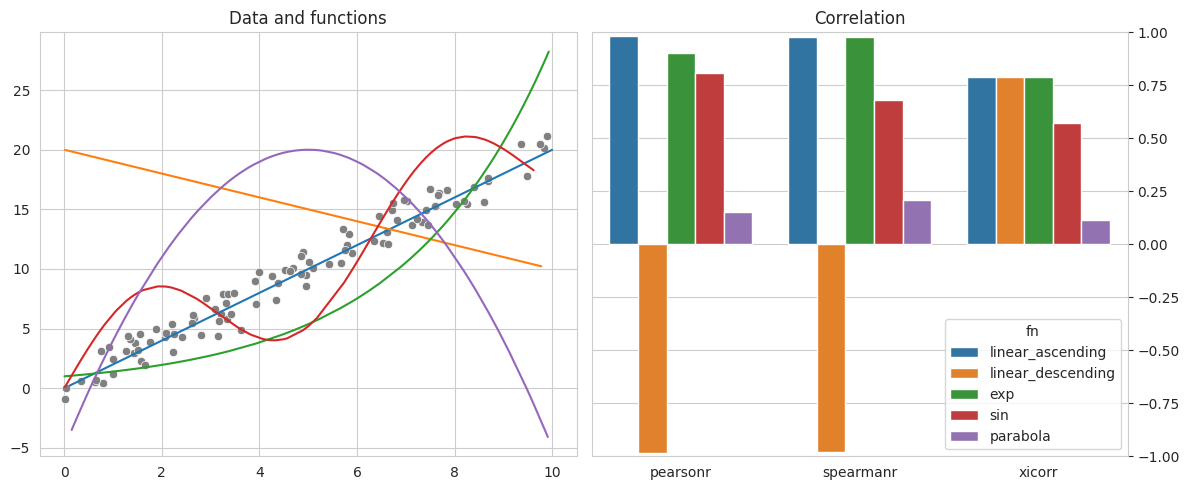

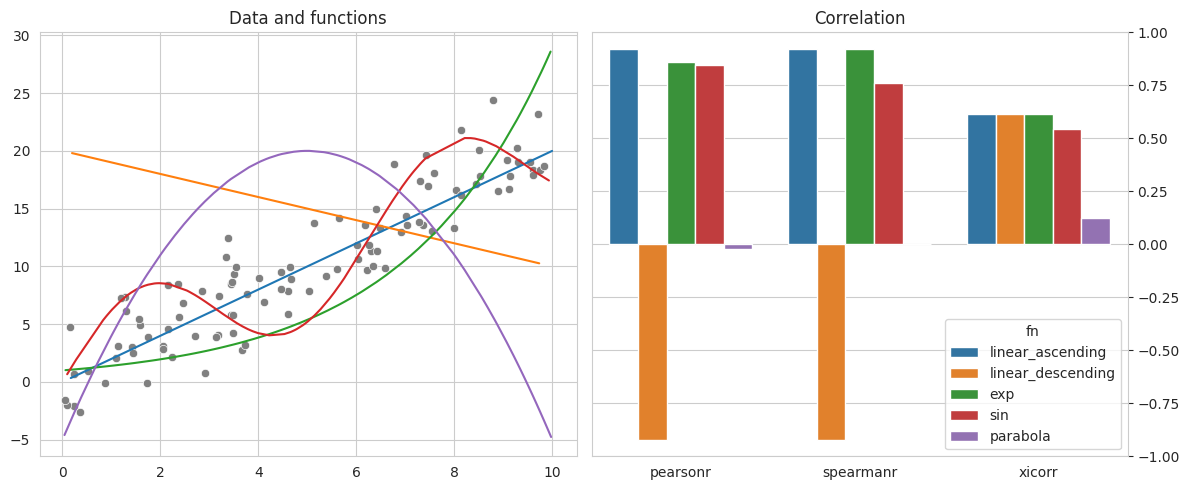

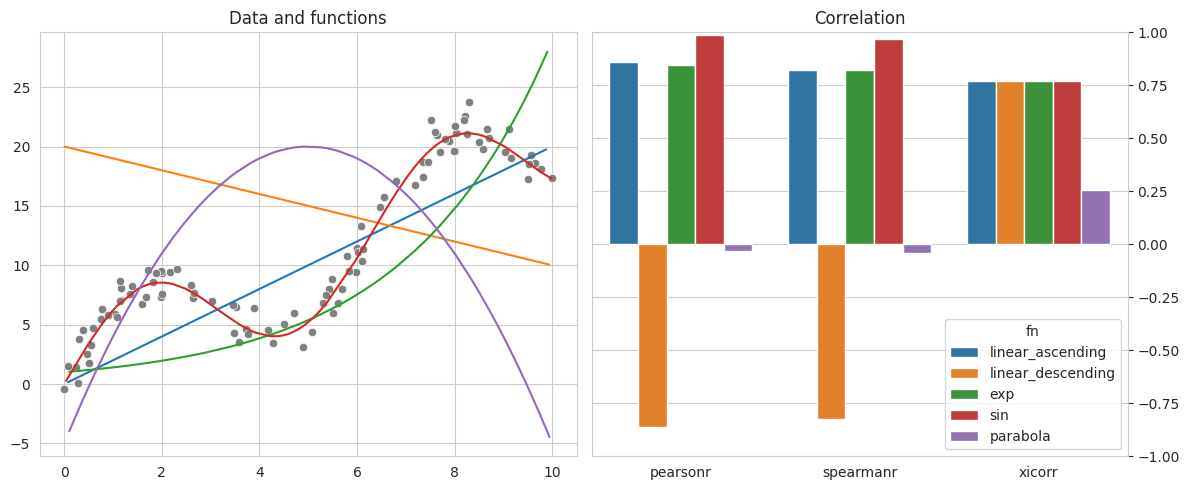

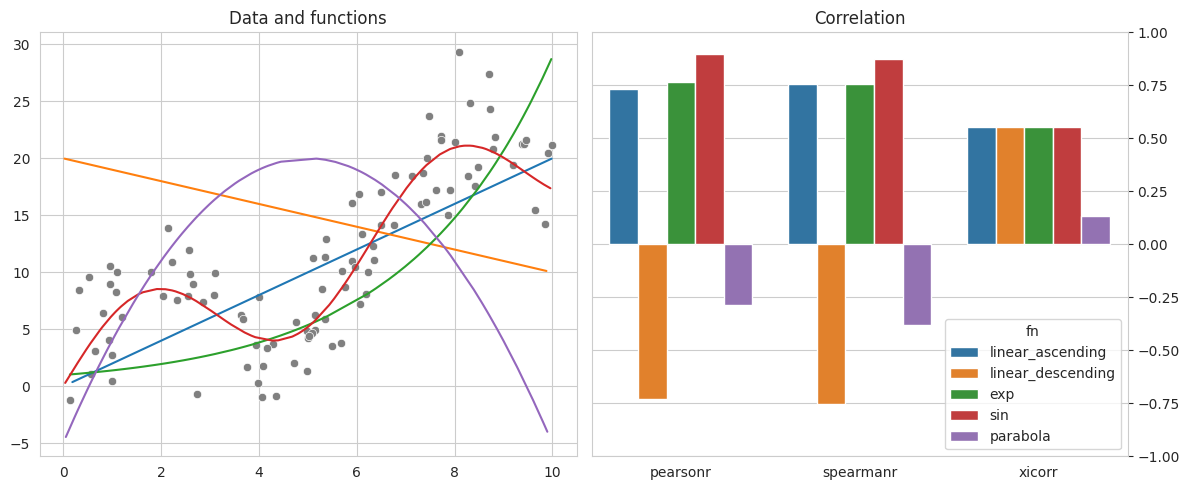

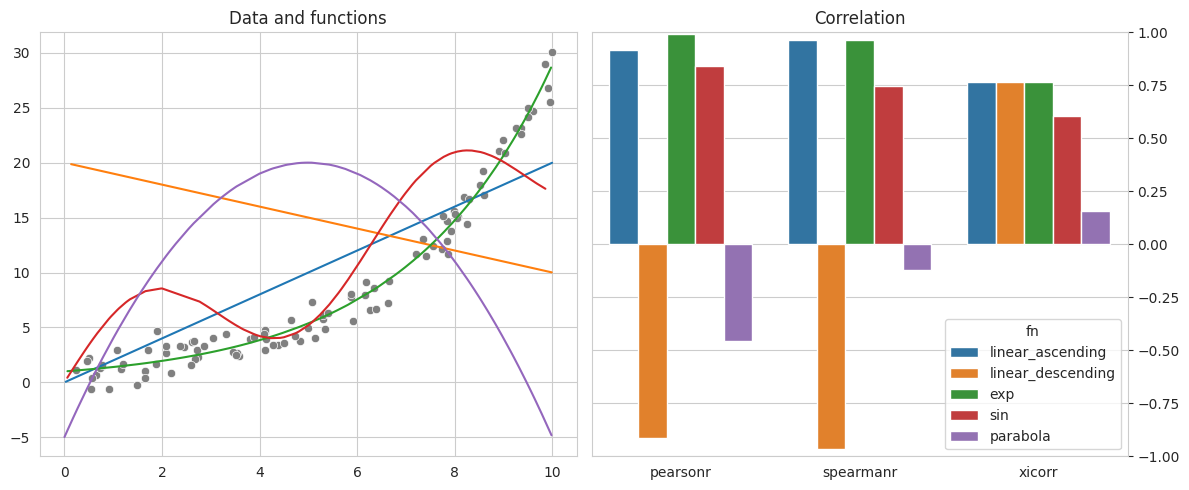

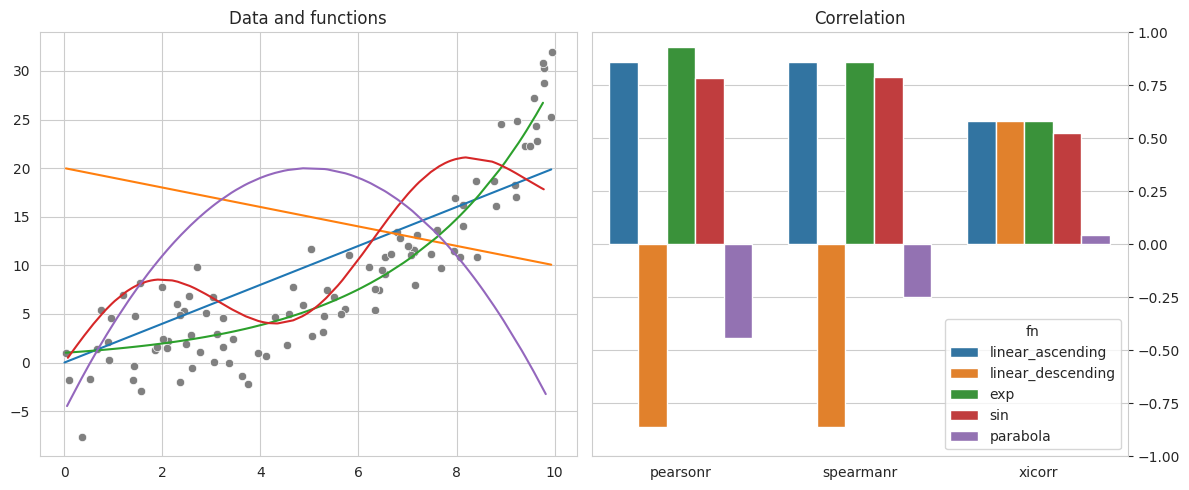

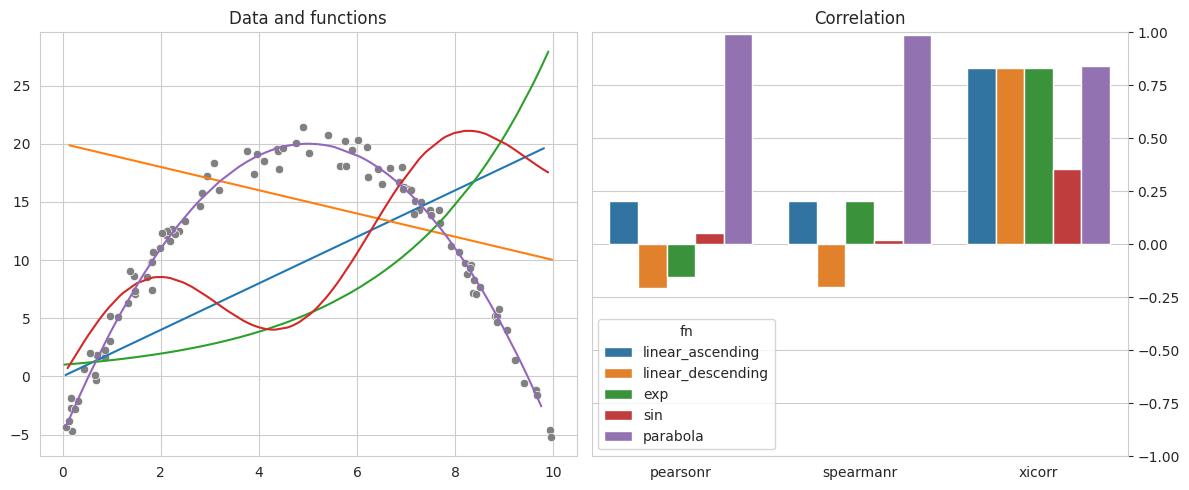

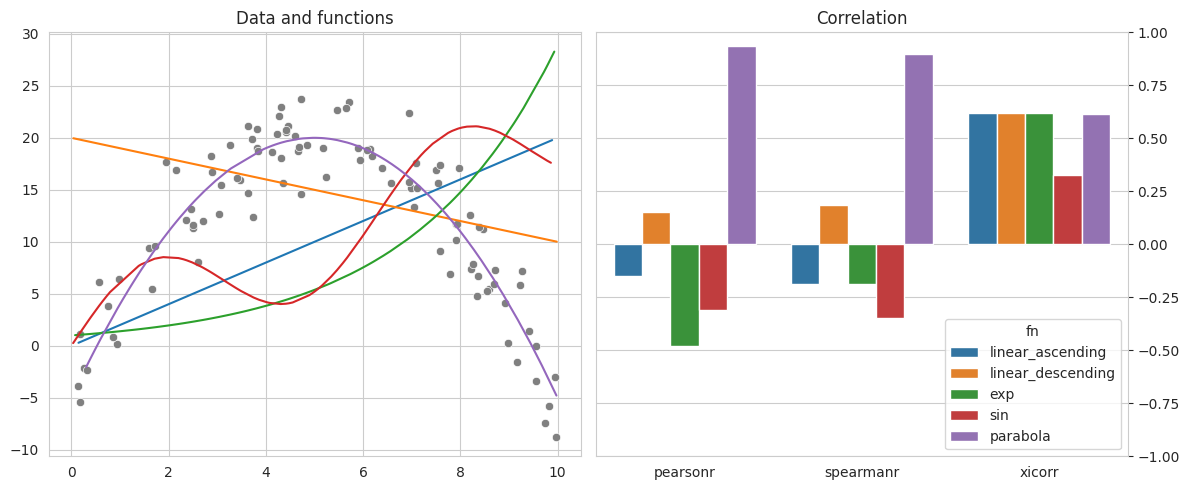

In [5]:
plot_correlation_comparision(linear_ascending, noise=1.0)
plot_correlation_comparision(linear_ascending, noise=3.0)
plot_correlation_comparision(sin, noise=1.0)
plot_correlation_comparision(sin, noise=3.0)
plot_correlation_comparision(exp, noise=1.0)
plot_correlation_comparision(exp, noise=3.0)
plot_correlation_comparision(parabola, noise=1.0)
plot_correlation_comparision(parabola, noise=3.0)

/tmp/ipykernel_2862507/1625245878.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_bar.set_yticklabels(ax_bar.get_yticklabels(), rotation=90, rotation_mode='anchor', ha='center')
/tmp/ipykernel_2862507/1625245878.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


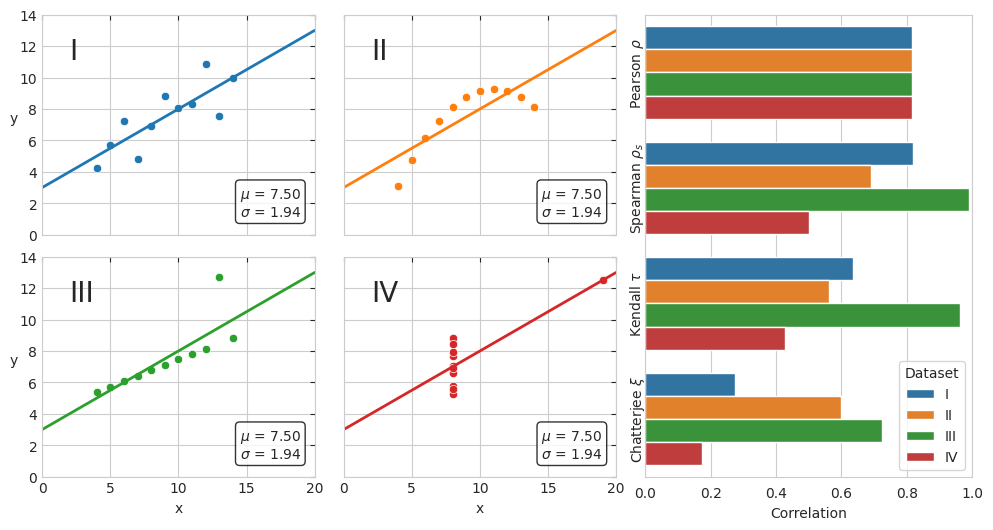

In [32]:
#Anscombe's quartet

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}
# Criação da figura com uma grade maior
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(2, 3, width_ratios=[1, 1, 1.2], hspace=0.1, wspace=0.1)

x_limits = (0, 20)
y_limits = (0, 14)

# Subplots de dispersão
axs = [fig.add_subplot(gs[i, j]) for i in range(2) for j in range(2)]
palette = sns.color_palette("tab10", len(datasets))
for i, (ax, (label, (x, y)), color) in enumerate(zip(axs, datasets.items(), palette)):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    sns.scatterplot(x=x, y=y, marker='o', ax=ax, color=color)

    # Regressão linear
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color=color, lw=2)

    if i in [0, 1]:
        ax.set_xticklabels([])
    if i in [1, 3]:
        ax.set_yticklabels([])
    if i in [2, 3]:        
        ax.set_xlabel('x')
    if i in [0, 2]:        
        ax.set_ylabel('y', rotation=0)
    # Adicionar caixa de texto para as estatísticas no estilo da legenda do seaborn
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}')
    bbox = dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=1, alpha=0.8)
    ax.text(0.95, 0.07, stats, fontsize=10, bbox=bbox,
            transform=ax.transAxes, verticalalignment='bottom', horizontalalignment='right')
    
     # Definir limites dos eixos X e Y
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)
    

# Adicionar subplot para gráficos de barras
ax_bar = fig.add_subplot(gs[:, 2])

# Dados para os gráficos de barras
stats_data = []
correlation_names = ['Pearson $\\rho$', 'Spearman $\\rho_s$', 'Kendall $\\tau$', 'Chatterjee $\\xi$']
correlation_fns = [pearson, spearman, kendall, chatterjee]
for label, (x, y) in datasets.items():
    for corr_name, corr_fn in zip(correlation_names, correlation_fns):
        stats_data_item = {
            'Dataset': label,
            'Correlation': corr_fn(x, y)[0],
            'Correlation type': corr_name
        }
        stats_data.append(stats_data_item)

# Converta os dados para um DataFrame
stats_df = pd.DataFrame(stats_data)

# Plotar gráficos de barras para cada estatística
sns.barplot(x='Correlation', y='Correlation type', hue='Dataset', data=stats_df, ax=ax_bar, palette=palette, errorbar=None)

# Girar rótulos do eixo y
ax_bar.set_yticklabels(ax_bar.get_yticklabels(), rotation=90, rotation_mode='anchor', ha='center')
ax_bar.set_xlim((0.0,1.0))
ax_bar.set_ylabel('')

# Ajustes finais e exibição

plt.tight_layout()
plt.savefig('plots/anscombe_quartet.pdf')
plt.show()